In [0]:
# Comando para conectar ao drive e ter acesso aos arquivos

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importando as bibliotecas

import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Lendo os dados do drive

train = pd.read_csv('/content/drive/My Drive/Computer science/8st/Data Mining/Atv2 - KNN/mnist/train.csv')

In [0]:
# Imprimindo os cinco primeiros elementos (cabeçalho)

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


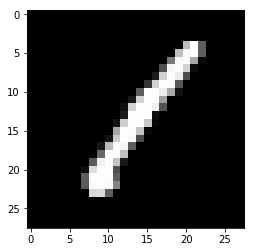

In [0]:
# Imprimindo um objeto do dataset

plt.imshow(train.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

In [0]:
# Separando a label das features

X = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [0]:
# Dividindo os dados em treino e teste

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [0]:
# Observando como ficou distribuído os dados para treino e teste

X.shape, X_test.shape, y.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [0]:
# Dividindo os dados em treino e validação

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [0]:
# Observando como ficou distribuido os dados para treino e validação

X_train.shape, X_validate.shape, y_train.shape, y_validate.shape

((26880, 784), (6720, 784), (26880,), (6720,))

In [0]:
# Testando o modelo para diferentes k's

accuracies = {}
models = {}
scores = {}
for k in range(1, 50, 2):
  models[k] = KNeighborsClassifier(n_neighbors=k, metric='euclidean', n_jobs=-1)
  models[k].fit(X_train, y_train)
  scores[k] = models[k].score(X_validate, y_validate)
  print('Para k = {}, accuracy: {}'.format(k, scores[k]))

Para k = 1, accuracy: 0.9666666666666667
Para k = 3, accuracy: 0.969047619047619
Para k = 5, accuracy: 0.9692857142857143
Para k = 7, accuracy: 0.9666666666666667
Para k = 9, accuracy: 0.9657142857142857
Para k = 11, accuracy: 0.9630952380952381
Para k = 13, accuracy: 0.9619047619047619
Para k = 15, accuracy: 0.960952380952381
Para k = 17, accuracy: 0.9595238095238096
Para k = 19, accuracy: 0.9578571428571429
Para k = 21, accuracy: 0.9552380952380952
Para k = 23, accuracy: 0.9521428571428572
Para k = 25, accuracy: 0.950952380952381
Para k = 27, accuracy: 0.9507142857142857
Para k = 29, accuracy: 0.9488095238095238
Para k = 31, accuracy: 0.9480952380952381
Para k = 33, accuracy: 0.9480952380952381
Para k = 35, accuracy: 0.9469047619047619
Para k = 37, accuracy: 0.9461904761904761
Para k = 39, accuracy: 0.9464285714285714
Para k = 41, accuracy: 0.945952380952381
Para k = 43, accuracy: 0.9442857142857143
Para k = 45, accuracy: 0.9428571428571428
Para k = 47, accuracy: 0.9428571428571428
P

In [0]:
# Testando o modelo de melhor resultado com os dados de teste usando a distância euclideana

model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9638095238095238

In [0]:
# Fazendo a predição sobre os dados de teste

y_pred_1 = model.predict(X_test)

array([1, 8, 6, ..., 7, 7, 1])

In [0]:
# Testando o modelo de melhor resultado com os dados de teste usando a distância manhattan

model2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan', n_jobs=-1)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.9560714285714286

In [0]:
# Fazendo a predição sobre os dados de teste

y_pred_2 = model2.predict(X_test)
y_pred_2

**Matriz de Confusão**

In [0]:
# Mostrando a matriz de confuzão

mt.confusion_matrix(y_test, y_pred_1)

array([[818,   0,   1,   0,   0,   4,   2,   0,   0,   1],
       [  0, 934,   1,   0,   0,   0,   1,   1,   0,   0],
       [  9,  14, 794,   3,   1,   0,   1,  12,   0,   1],
       [  2,   5,   5, 831,   0,  14,   0,   5,   4,   4],
       [  0,   8,   0,   0, 783,   0,   3,   1,   0,  19],
       [  3,   2,   0,   8,   0, 728,   8,   1,   3,   6],
       [  3,   2,   0,   0,   1,   4, 818,   0,   0,   0],
       [  0,  11,   0,   3,   4,   0,   0, 851,   0,  11],
       [  8,  15,   3,  16,   5,  15,   2,   2, 736,  11],
       [  4,   1,   1,   4,   9,   2,   0,  13,   1, 803]])

In [0]:
mt.confusion_matrix(y_test, y_pred_2)

array([[817,   0,   1,   0,   0,   3,   4,   0,   0,   1],
       [  0, 934,   1,   0,   0,   0,   0,   2,   0,   0],
       [  9,  22, 783,   5,   1,   1,   1,  13,   0,   0],
       [  2,   5,   5, 829,   0,  16,   0,   5,   4,   4],
       [  0,  12,   0,   0, 774,   0,   2,   1,   0,  25],
       [  3,   6,   1,  12,   0, 720,   7,   1,   2,   7],
       [  5,   2,   0,   0,   1,   4, 816,   0,   0,   0],
       [  0,  15,   0,   2,   2,   0,   0, 851,   0,  10],
       [ 11,  22,   4,  19,   4,  25,   2,   2, 712,  12],
       [  5,   4,   0,   5,   8,   1,   0,  20,   0, 795]])

**Accuracy Score**


In [0]:
# Calculando a Accuracy Score

mt.accuracy_score(y_test, y_pred_1)

0.9638095238095238

In [0]:
mt.accuracy_score(y_test, y_pred_2)

0.9560714285714286

**Tabela de métricas**

In [0]:
# Imprimindo as métricas mais importantes

print(mt.classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       826
           1       0.94      1.00      0.97       937
           2       0.99      0.95      0.97       835
           3       0.96      0.96      0.96       870
           4       0.98      0.96      0.97       814
           5       0.95      0.96      0.95       759
           6       0.98      0.99      0.98       828
           7       0.96      0.97      0.96       880
           8       0.99      0.91      0.95       813
           9       0.94      0.96      0.95       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

